In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
nba_df= pd.read_csv("Resources/Final_nba_df.csv") 


In [2]:
with pd.option_context('display.max_columns', None):
    display(nba_df.head())

,GAME_ID,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,PLAYER_NAME,PLAYER_ID,GAME_CLOCK_SECONDS,TOTAL_TIME_SECONDS,MINUTES,SECONDS
0,21400899,W,24,1,1,1:09,10.8,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148,69,2229,1,9
1,21400899,W,24,2,1,0:14,3.4,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148,14,2174,0,14
2,21400899,W,24,3,1,0:00,0.0,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148,0,2160,0,0
3,21400899,W,24,4,2,11:47,10.3,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148,707,2147,11,47
4,21400899,W,24,5,2,10:34,10.9,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148,634,2074,10,34


In [3]:
close_games= nba_df.loc[nba_df['FINAL_MARGIN'].abs() <= 3]
clutch= close_games.loc[(close_games['MINUTES'] == 0) & (close_games['SECONDS'] <= 24)]
clutch

,GAME_ID,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,SHOT_DIST,PTS_TYPE,SHOT_RESULT,...,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,PLAYER_NAME,PLAYER_ID,GAME_CLOCK_SECONDS,TOTAL_TIME_SECONDS,MINUTES,SECONDS
54,21400768,L,-1,14,4,0:01,1.0,34.4,3,missed,...,201588,3.6,0,0,brian roberts,203148,1,1,0,1
299,21400195,L,-1,2,1,0:00,0.0,23.9,3,missed,...,203894,3.6,0,0,brian roberts,203148,0,2160,0,0
310,21400160,L,-2,3,1,0:04,4.0,24.8,3,made,...,201155,4.2,1,3,brian roberts,203148,4,2164,0,4
349,21400071,W,3,1,1,0:02,2.0,22.1,2,missed,...,203118,3.8,0,0,brian roberts,203148,2,2162,0,2
623,21400768,L,-1,9,2,0:02,2.0,8.2,2,missed,...,201588,2.5,0,0,al jefferson,2744,2,1442,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127831,21400432,W,2,4,1,0:03,3.0,25.0,3,made,...,201148,5.4,1,3,jarrett jack,101127,3,2163,0,3
127928,21400266,W,2,1,1,0:21,14.0,6.9,2,made,...,2225,3.9,1,2,jarrett jack,101127,21,2181,0,21
127933,21400266,W,2,6,3,0:00,0.0,32.1,3,missed,...,201158,4.4,0,0,jarrett jack,101127,0,720,0,0
127980,21400178,W,2,8,2,0:24,21.1,0.9,2,made,...,203460,1.3,1,2,jarrett jack,101127,24,1464,0,24


In [4]:

new_clutch= clutch.groupby("PLAYER_NAME")
made_shots=new_clutch["FGM"].sum()
shot_count= new_clutch["PLAYER_ID"].count()
clutch_chart= pd.DataFrame({"Shot Count": shot_count,
                           "Made Shots": made_shots})
clutch_chart["Success Rate"]= made_shots/shot_count
clutch_chart=clutch_chart.sort_values(["Success Rate", 'Made Shots'], ascending= False)
most_attempts= clutch_chart["Shot Count"].max()
weighted_made_shots= clutch_chart["Made Shots"]*0.5
weighted_success_rate= clutch_chart["Success Rate"]*0.5
clutch_chart["Weighted Rank"]= (weighted_made_shots+weighted_success_rate)/2
clutch_chart.sort_values("Weighted Rank", ascending=False).head(10)


,Shot Count,Made Shots,Success Rate,Weighted Rank
PLAYER_NAME,,,,
brandon knight,17,10,0.588235,2.647059
james harden,11,8,0.727273,2.181818
jarrett jack,12,8,0.666667,2.166667
tyreke evans,18,8,0.444444,2.111111
manu ginobili,17,7,0.411765,1.852941
lou williams,10,6,0.600000,1.650000
tim duncan,13,6,0.461538,1.615385
john wall,17,6,0.352941,1.588235
nikola vucevic,6,5,0.833333,1.458333


In [5]:
three_pts= clutch.loc[clutch["PTS_TYPE"] == 3]
new_three= three_pts.groupby("PLAYER_NAME")
made_threes= new_three["FGM"].sum()
three_count= new_three["PLAYER_ID"].count()
three_chart= pd.DataFrame({"3s Count": three_count,
                          "Made 3s": made_threes})
three_chart["Missed 3s"]= three_count- made_threes
three_chart["Success Rate"]= three_chart["Made 3s"]/three_chart["3s Count"]
weighted_made_threes= made_threes*0.5
weighted_success_rate3= three_chart["Success Rate"]*0.5
three_chart["Weighted Rank"]= (weighted_made_threes+weighted_success_rate3)/2
three_chart.sort_values("Weighted Rank", ascending= False).head(10)

,3s Count,Made 3s,Missed 3s,Success Rate,Weighted Rank
PLAYER_NAME,,,,,
james harden,4,3,1,0.750000,0.937500
danny green,4,3,1,0.750000,0.937500
nick young,6,3,3,0.500000,0.875000
tyreke evans,7,3,4,0.428571,0.857143
trey burke,8,3,5,0.375000,0.843750
kyrie irving,2,2,0,1.000000,0.750000
kyle korver,2,2,0,1.000000,0.750000
stephen curry,3,2,1,0.666667,0.666667
evan turner,3,2,1,0.666667,0.666667


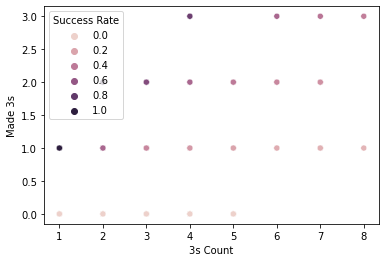

In [6]:
# fig1, ax1 = plt.subplots(figsize=(12, 8))
# plt.scatter(three_count,made_threes)
# plt.xlabel("Attempted 3s")
# plt.xticks(np.arange(0, 9, step=1))
# plt.yticks(np.arange(0, 4, step=1))
# plt.title("Clutch 3 Pointers")
# plt.ylabel("Made 3s")

# slope_perf= 1
# # slope_half= 0.5
# perfect_line = three_count * slope_perf 
# # half_line= three_count* slope_half
# plt.plot(three_count, perfect_line, "g-")
# # plt.plot(three_count, half_line,'y-')
# plt.show()

sns.scatterplot(data=three_chart, x="3s Count", y="Made 3s", hue="Success Rate")

In [7]:
two_pts= clutch.loc[clutch["PTS_TYPE"] == 2]
new_two= two_pts.groupby("PLAYER_NAME")
made_two= new_two["FGM"].sum()
two_count= new_two["PLAYER_ID"].count()
two_chart= pd.DataFrame({"2s Count": two_count,
                          "Made 2s": made_two})
two_chart["Missed 2s"]= two_count- made_two
two_chart["Success Rate"]= two_chart["Made 2s"]/two_chart["2s Count"]
weighted_made_two= made_two*0.5
weighted_success_rate2= two_chart["Success Rate"]*0.5
two_chart["Weighted Rank"]= (weighted_made_two+weighted_success_rate2)/2
two_chart.sort_values("Weighted Rank", ascending= False).head(10)
#207 players

,2s Count,Made 2s,Missed 2s,Success Rate,Weighted Rank
PLAYER_NAME,,,,,
brandon knight,11,8,3,0.727273,2.181818
jarrett jack,9,7,2,0.777778,1.944444
lou williams,6,6,0,1.000000,1.750000
manu ginobili,11,6,5,0.545455,1.636364
tim duncan,11,6,5,0.545455,1.636364
nikola vucevic,6,5,1,0.833333,1.458333
james harden,7,5,2,0.714286,1.428571
john wall,9,5,4,0.555556,1.388889
chris paul,10,5,5,0.500000,1.375000


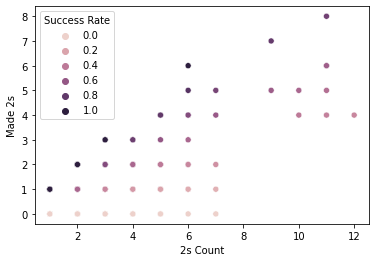

In [8]:
sns.scatterplot(data=two_chart, x="2s Count", y="Made 2s", hue= "Success Rate")

In [9]:
clutchw=clutch.loc[clutch["W"]== 'W']
new_clutch_w= clutchw.groupby("PLAYER_NAME")
made_shots2_w=new_clutch_w["FGM"].sum()
shot_count2_w= new_clutch_w["PLAYER_ID"].count()
clutch_chart_w= pd.DataFrame({"Shot Count": shot_count2_w,
                           "Made Shots": made_shots2_w})
clutch_chart_w["Success Rate"]= made_shots2_w/shot_count2_w
clutch_chart_w=clutch_chart_w.sort_values(["Success Rate", 'Made Shots'], ascending= False)
most_attempts_w= clutch_chart_w["Shot Count"].max()
weighted_made_shots_w= clutch_chart_w["Made Shots"]*0.5
weighted_success_rate_w= clutch_chart_w["Success Rate"]*0.5
clutch_chart_w["Weighted Rank"]= (weighted_made_shots_w+weighted_success_rate_w)/2
clutch_chart_w.sort_values("Weighted Rank", ascending=False)


,Shot Count,Made Shots,Success Rate,Weighted Rank
PLAYER_NAME,,,,
jarrett jack,12,8,0.666667,2.166667
tyreke evans,13,8,0.615385,2.153846
kemba walker,12,5,0.416667,1.354167
james harden,4,4,1.000000,1.250000
marc gasol,4,4,1.000000,1.250000
...,...,...,...,...
devin harris,2,0,0.000000,0.000000
derrick williams,1,0,0.000000,0.000000
dante exum,3,0,0.000000,0.000000


In [10]:
three_pts_w= clutchw.loc[clutch["PTS_TYPE"] == 3]
new_three_w= three_pts_w.groupby("PLAYER_NAME")
made_threes_w= new_three_w["FGM"].sum()
three_count_w= new_three_w["PLAYER_ID"].count()
three_chart_w= pd.DataFrame({"3s Count": three_count_w,
                          "Made 3s": made_threes_w})
three_chart_w["Missed 3s"]= three_count_w- made_threes_w
three_chart_w["Success Rate"]= three_chart_w["Made 3s"]/three_chart_w["3s Count"]
weighted_made_threes_w= made_threes_w*0.5
weighted_success_rate3_w= three_chart_w["Success Rate"]*0.5
three_chart_w["Weighted Rank"]= (weighted_made_threes_w+weighted_success_rate3_w)/2
three_chart_w.sort_values("Weighted Rank", ascending= False).head(10)

,3s Count,Made 3s,Missed 3s,Success Rate,Weighted Rank
PLAYER_NAME,,,,,
nick young,4,3,1,0.75,0.9375
tyreke evans,4,3,1,0.75,0.9375
mike conley,4,2,2,0.50,0.6250
brandon jennings,4,2,2,0.50,0.6250
courtney lee,1,1,0,1.00,0.5000
stephen curry,1,1,0,1.00,0.5000
evan turner,1,1,0,1.00,0.5000
kyrie irving,1,1,0,1.00,0.5000
otto porter,1,1,0,1.00,0.5000


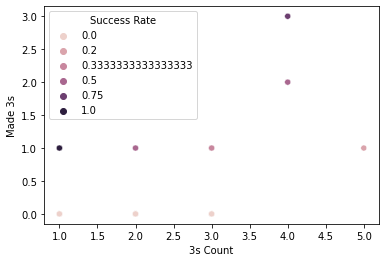

In [11]:

sns.scatterplot(data=three_chart_w, x="3s Count", y="Made 3s", hue= "Success Rate")

In [12]:
two_pts_w= clutchw.loc[clutch["PTS_TYPE"] == 2]
new_two_w= two_pts_w.groupby("PLAYER_NAME", as_index=True)
made_two_w= new_two_w["FGM"].sum()
two_count_w= new_two_w["PLAYER_ID"].count()
two_chart_w= pd.DataFrame({"2s Count": two_count_w,
                          "Made 2s": made_two_w})
two_chart_w["Missed 2s"]= two_count_w- made_two_w
two_chart_w["Success Rate"]= two_chart_w["Made 2s"]/two_chart_w["2s Count"]
weighted_made_two_w= made_two_w*0.5
weighted_success_rate2_w= two_chart_w["Success Rate"]*0.5
two_chart_w["Weighted Rank"]= (weighted_made_two_w+weighted_success_rate2_w)/2
two_chart_w.sort_values("Weighted Rank", ascending= False).head(10)

,2s Count,Made 2s,Missed 2s,Success Rate,Weighted Rank
PLAYER_NAME,,,,,
jarrett jack,9,7,2,0.777778,1.944444
tyreke evans,9,5,4,0.555556,1.388889
john wall,6,4,2,0.666667,1.166667
russell westbrook,6,4,2,0.666667,1.166667
kemba walker,7,4,3,0.571429,1.142857
james harden,3,3,0,1.000000,1.000000
marc gasol,3,3,0,1.000000,1.000000
nikola vucevic,3,3,0,1.000000,1.000000
brandon knight,4,3,1,0.750000,0.937500


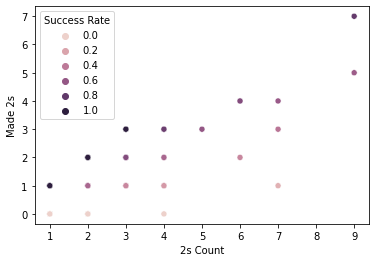

In [13]:

sns.scatterplot(data=two_chart_w, x="2s Count", y="Made 2s", hue= "Success Rate")

In [14]:
clutchl=clutch.loc[clutch["W"]== 'L']
new_clutch_l= clutchl.groupby("PLAYER_NAME")
loss_count= new_clutch_l["GAME_ID"].count()
made_shots2_l=new_clutch_l["FGM"].sum()
shot_count2_l= new_clutch_l["PLAYER_ID"].count()
clutch_chart_l= pd.DataFrame({"Shot Count": shot_count2_l,
                           "Made Shots": made_shots2_l,
                             "Loss Count": loss_count})
clutch_chart_l["Success Rate"]= made_shots2_l/shot_count2_l
clutch_chart_l=clutch_chart_l.sort_values(["Success Rate", 'Made Shots'], ascending= False)
most_attempts_l= clutch_chart_l["Shot Count"].max()
weighted_made_shots_l= clutch_chart_l["Made Shots"]*0.5
weighted_success_rate_l= clutch_chart_l["Success Rate"]*0.5
clutch_chart_l["Weighted Rank"]= (weighted_made_shots_l+weighted_success_rate_l)/2
clutch_chart_l.sort_values("Weighted Rank", ascending=False)

,Shot Count,Made Shots,Loss Count,Success Rate,Weighted Rank
PLAYER_NAME,,,,,
brandon knight,11,6,11,0.545455,1.636364
chase budinger,5,4,5,0.800000,1.200000
zaza pachulia,6,4,6,0.666667,1.166667
lou williams,7,4,7,0.571429,1.142857
james harden,7,4,7,0.571429,1.142857
...,...,...,...,...,...
demarre carroll,1,0,1,0.000000,0.000000
darrell arthur,2,0,2,0.000000,0.000000
danilo gallinai,2,0,2,0.000000,0.000000


In [15]:
three_pts_l= clutchl.loc[clutch["PTS_TYPE"] == 3]
new_three_l= three_pts_l.groupby("PLAYER_NAME")
made_threes_l= new_three_l["FGM"].sum()
three_count_l= new_three_l["PLAYER_ID"].count()
three_chart_l= pd.DataFrame({"3s Count": three_count_l,
                          "Made 3s": made_threes_l})
three_chart_l["Missed 3s"]= three_count_l- made_threes_l
three_chart_l["Success Rate"]= three_chart_l["Made 3s"]/three_chart_l["3s Count"]
weighted_made_threes_l= made_threes_l*0.5
weighted_success_rate3_l= three_chart_l["Success Rate"]*0.5
three_chart_l["Weighted Rank"]= (weighted_made_threes_l+weighted_success_rate3_l)/2
three_chart_l.sort_values("Weighted Rank", ascending= False).head(10)

,3s Count,Made 3s,Missed 3s,Success Rate,Weighted Rank
PLAYER_NAME,,,,,
danny green,3,3,0,1.000000,1.000000
trey burke,5,3,2,0.600000,0.900000
kyle korver,2,2,0,1.000000,0.750000
james harden,3,2,1,0.666667,0.666667
avery bradley,3,2,1,0.666667,0.666667
jeremy lin,4,2,2,0.500000,0.625000
carmelo anthony,4,2,2,0.500000,0.625000
mo williams,5,2,3,0.400000,0.600000
dwayne wade,6,2,4,0.333333,0.583333


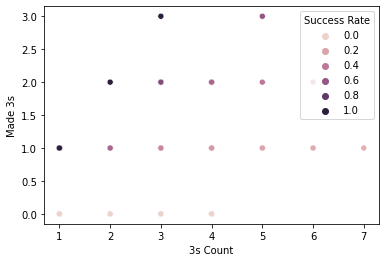

In [16]:

sns.scatterplot(data=three_chart_l, x="3s Count", y="Made 3s", hue= "Success Rate")

In [17]:
two_pts_l= clutchl.loc[clutch["PTS_TYPE"] == 2]
new_two_l= two_pts_l.groupby("PLAYER_NAME", as_index=True)
made_two_l= new_two_l["FGM"].sum()
two_count_l= new_two_l["PLAYER_ID"].count()
two_chart_l= pd.DataFrame({"2s Count": two_count_l,
                          "Made 2s": made_two_l})
two_chart_l["Missed 2s"]= two_count_l- made_two_l
two_chart_l["Success Rate"]= two_chart_l["Made 2s"]/two_chart_l["2s Count"]
weighted_made_two_l= made_two_l*0.5
weighted_success_rate2_l= two_chart_l["Success Rate"]*0.5
two_chart_l["Weighted Rank"]= (weighted_made_two_l+weighted_success_rate2_l)/2
two_chart_l.sort_values("Weighted Rank", ascending= False).head(10)

,2s Count,Made 2s,Missed 2s,Success Rate,Weighted Rank
PLAYER_NAME,,,,,
brandon knight,7,5,2,0.714286,1.428571
lou williams,4,4,0,1.000000,1.250000
chase budinger,5,4,1,0.800000,1.200000
zaza pachulia,6,4,2,0.666667,1.166667
tim duncan,8,4,4,0.500000,1.125000
luis scola,3,3,0,1.000000,1.000000
dennis schroder,4,3,1,0.750000,0.937500
jeff teague,5,3,2,0.600000,0.900000
markieff morris,5,3,2,0.600000,0.900000


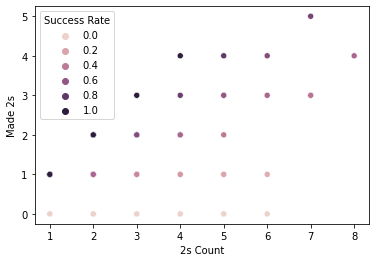

In [18]:

sns.scatterplot(data=two_chart_l, x="2s Count", y="Made 2s", hue= "Success Rate")